# **API with Python**

**APi** stands on Application programming interface

**RSET** stands on Representational State Transfer

**json** stands on JavaScript Object Notation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import plotly.io as pio
import plotly.express as px
from collections import Counter
pio.templates.default = 'plotly_dark'
from pandas import json_normalize

# **API Stackoverflow**
- Extract information about Badges

#### **Discussion**

Returns all the badges in the system.

Badge sorts are a tad complicated. For the purposes of sorting (and min/max) tag_based is considered to be greater than named.

This means that you can get a list of all tag based badges by passing min=tag_based, and conversely all the named badges by passing max=named, with sort=type.

For ranks, bronze is greater than silver which is greater than gold. Along with sort=rank, set max=gold for just gold badges, max=silver&min=silver for just silver, and min=bronze for just bronze.

rank is the default sort.

This method returns a list of badges.

- Extract information about Questions


#### **Discussion**

Gets all the questions on the site.

This method allows you make fairly flexible queries across the entire corpus of questions on a site. For example, getting all questions asked in the the week of Jan 1st 2011 with scores of 10 or more is a single query with parameters sort=votes&min=10&fromdate=1293840000&todate=1294444800.

To constrain questions returned to those with a set of tags, use the tagged parameter with a semi-colon delimited list of tags. This is an and constraint, passing tagged=c;java will return only those questions with both tags. As such, passing more than 5 tags will always return zero results.

The sorts accepted by this method operate on the following fields of the question object:

activity – last_activity_date
creation – creation_date
votes – score
hot – by the formula ordering the hot tab
Does not accept min or max
week – by the formula ordering the week tab
Does not accept min or max
month – by the formula ordering the month tab
Does not accept min or max
activity is the default sort.

<center>
<img align="center" src="12.png"     style=" width:400px; padding: 20px; " > 
<center>


It is possible to create moderately complex queries using sort, min, max, fromdate, and todate.
This method returns a list of questions.

### **Extract information about Questions**


In [2]:
ques_sta_req = requests.get('https://api.stackexchange.com/2.3/questions?order=desc&sort=activity&site=stackoverflow')

In [3]:
ques_js = ques_sta_req.json()

In [4]:
ques_js

{'items': [{'tags': ['wso2', 'wso2-integration-studio'],
   'owner': {'account_id': 9052084,
    'reputation': 85,
    'user_id': 6741726,
    'user_type': 'registered',
    'profile_image': 'https://graph.facebook.com/1833413073561177/picture?type=large',
    'display_name': 'Ahmet Kalem',
    'link': 'https://stackoverflow.com/users/6741726/ahmet-kalem'},
   'is_answered': False,
   'view_count': 21,
   'answer_count': 1,
   'score': 1,
   'last_activity_date': 1673832199,
   'creation_date': 1673814051,
   'question_id': 75128145,
   'content_license': 'CC BY-SA 4.0',
   'link': 'https://stackoverflow.com/questions/75128145/how-to-read-data-from-mongo-query-result-as-json-format-in-wso2-integration-stud',
   'title': 'How to read data from mongo query result as Json Format in WSo2 Integration Studio Data Service Project?'},
  {'tags': ['powershell', 'rename'],
   'owner': {'account_id': 27538334,
    'reputation': 11,
    'user_id': 21015539,
    'user_type': 'registered',
    'prof

In [5]:
ques_dist = ques_js['items']

In [6]:
ques_df = pd.DataFrame(ques_dist)

In [7]:
ques_df

,tags,owner,is_answered,view_count,answer_count,score,last_activity_date,creation_date,question_id,content_license,link,title,last_edit_date,closed_date,closed_reason,accepted_answer_id
0,"[wso2, wso2-integration-studio]","{'account_id': 9052084, 'reputation': 85, 'use...",False,21,1,1,1673832199,1673814051,75128145,CC BY-SA 4.0,https://stackoverflow.com/questions/75128145/h...,How to read data from mongo query result as Js...,NaN,NaN,NaN,NaN
1,"[powershell, rename]","{'account_id': 27538334, 'reputation': 11, 'us...",False,19,2,1,1673832194,1673828541,75129321,CC BY-SA 4.0,https://stackoverflow.com/questions/75129321/r...,Rename files in subfolders,1.673832e+09,NaN,NaN,NaN
2,[php],"{'account_id': 10598455, 'reputation': 13, 'us...",True,33,2,0,1673832187,1673794955,75126037,NaN,https://stackoverflow.com/questions/75126037/u...,unable to split Arabic Alphabets,1.673796e+09,1.673832e+09,Duplicate,NaN
3,"[multithreading, mqtt, mosquitto, paho, broker]","{'account_id': 8364615, 'reputation': 31, 'use...",True,1397,2,1,1673832187,1609500603,65529302,CC BY-SA 4.0,https://stackoverflow.com/questions/65529302/c...,Can paho-mqtt client connect to multiple broke...,NaN,NaN,NaN,65529398.0
4,"[python, python-3.x]","{'account_id': 21064467, 'reputation': 1, 'use...",False,11,0,-1,1673832180,1673831852,75129499,CC BY-SA 4.0,https://stackoverflow.com/questions/75129499/s...,"So, why does the squaring function do this? If...",1.673832e+09,NaN,NaN,NaN
5,"[python, python-3.x]","{'account_id': 27515340, 'reputation': 19, 'us...",True,24,2,1,1673832150,1673828551,75129322,CC BY-SA 4.0,https://stackoverflow.com/questions/75129322/h...,How sort the images filename and then calculat...,NaN,NaN,NaN,NaN
6,"[yaml, antlr4, abstract-syntax-tree]","{'account_id': 12646258, 'reputation': 1, 'use...",False,2,0,0,1673832138,1673832138,75129519,CC BY-SA 4.0,https://stackoverflow.com/questions/75129519/h...,how to deal char &#39;:&#39; and assign(:) in ...,NaN,NaN,NaN,NaN
7,[python-3.7],"{'account_id': 16771956, 'reputation': 3, 'use...",True,2473,4,0,1673832121,1569492340,58114383,CC BY-SA 4.0,https://stackoverflow.com/questions/58114383/h...,How to remove &#39;0x&#39; in hex and get 2 di...,1.569503e+09,NaN,NaN,58114716.0
8,"[python, pandas, regex, dataframe]","{'account_id': 27207299, 'reputation': 11, 'us...",False,6,0,0,1673832109,1673832109,75129517,CC BY-SA 4.0,https://stackoverflow.com/questions/75129517/p...,Passing CSV File Into Pandas Dataframe and Add...,NaN,NaN,NaN,NaN
9,"[tsql, query-optimization]","{'account_id': 27538247, 'reputation': 1, 'use...",False,8,0,0,1673832093,1673827241,75129239,CC BY-SA 4.0,https://stackoverflow.com/questions/75129239/w...,What does CASE WHEN EXISTS (select * from tabl...,1.673832e+09,NaN,NaN,NaN


In [8]:
ques_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tags                30 non-null     object 
 1   owner               30 non-null     object 
 2   is_answered         30 non-null     bool   
 3   view_count          30 non-null     int64  
 4   answer_count        30 non-null     int64  
 5   score               30 non-null     int64  
 6   last_activity_date  30 non-null     int64  
 7   creation_date       30 non-null     int64  
 8   question_id         30 non-null     int64  
 9   content_license     28 non-null     object 
 10  link                30 non-null     object 
 11  title               30 non-null     object 
 12  last_edit_date      12 non-null     float64
 13  closed_date         2 non-null      float64
 14  closed_reason       2 non-null      object 
 15  accepted_answer_id  5 non-null      float64
dtypes: bool(1)

In [9]:
ques_df.columns

Index(['tags', 'owner', 'is_answered', 'view_count', 'answer_count', 'score',
       'last_activity_date', 'creation_date', 'question_id', 'content_license',
       'link', 'title', 'last_edit_date', 'closed_date', 'closed_reason',
       'accepted_answer_id'],
      dtype='object')

### **How many questions in the stack overflow were answered?**

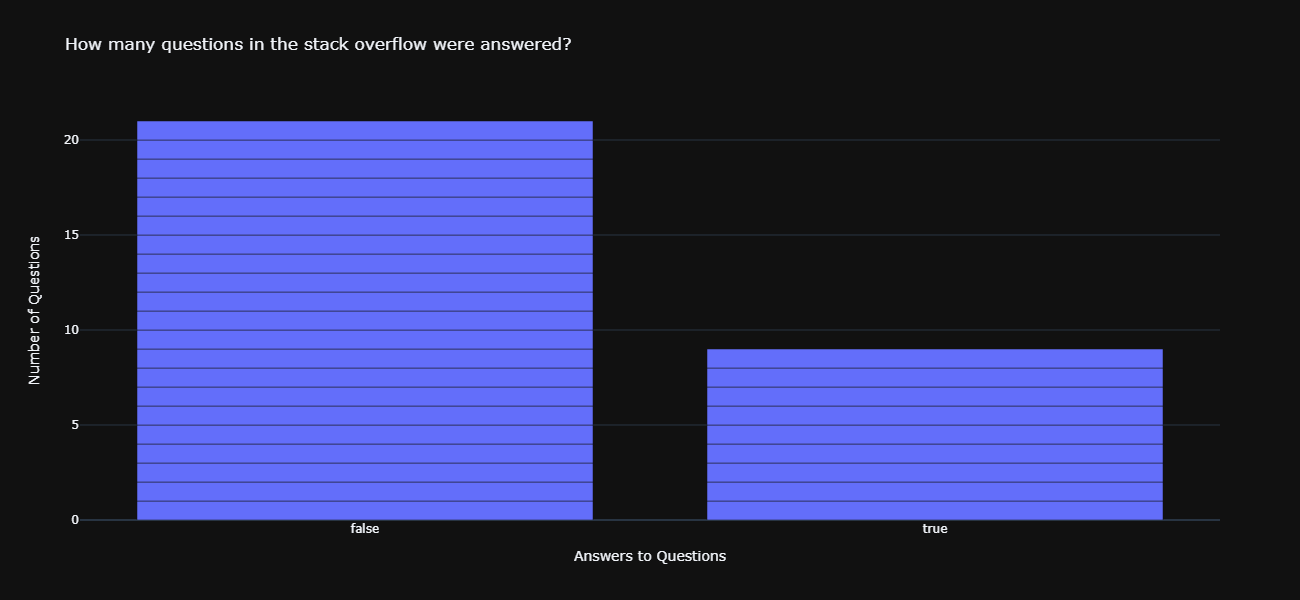

In [32]:
fig2 = px.bar(ques_df,
        x='is_answered',
        title="How many questions in the stack overflow were answered?",
        labels={
                     "is_answered": "Answers to Questions",
                     "count": "Number of Questions"
                 },
                 width=1300, height=600
        )

fig2.show("png")        

### **What is the most popular programming language that people ask about?**

In [11]:
ques_df['tags']

0                       [wso2, wso2-integration-studio]
1                                  [powershell, rename]
2                                                 [php]
3       [multithreading, mqtt, mosquitto, paho, broker]
4                                  [python, python-3.x]
5                                  [python, python-3.x]
6                  [yaml, antlr4, abstract-syntax-tree]
7                                          [python-3.7]
8                    [python, pandas, regex, dataframe]
9                            [tsql, query-optimization]
10                                  [c++, clang-format]
11                                   [bash, shell, sed]
12                           [javascript, ecmascript-6]
13                       [reactjs, email, button, href]
14    [android, kotlin, broadcastreceiver, alarmmana...
15                       [node.js, bash, macos, stream]
16                    [python, dataframe, sorting, nan]
17            [spring, spring-webflux, project-r

In [12]:
listed_item = ques_df['tags'].to_list()

In [13]:
listed_item

[['wso2', 'wso2-integration-studio'],
 ['powershell', 'rename'],
 ['php'],
 ['multithreading', 'mqtt', 'mosquitto', 'paho', 'broker'],
 ['python', 'python-3.x'],
 ['python', 'python-3.x'],
 ['yaml', 'antlr4', 'abstract-syntax-tree'],
 ['python-3.7'],
 ['python', 'pandas', 'regex', 'dataframe'],
 ['tsql', 'query-optimization'],
 ['c++', 'clang-format'],
 ['bash', 'shell', 'sed'],
 ['javascript', 'ecmascript-6'],
 ['reactjs', 'email', 'button', 'href'],
 ['android',
  'kotlin',
  'broadcastreceiver',
  'alarmmanager',
  'android-broadcast'],
 ['node.js', 'bash', 'macos', 'stream'],
 ['python', 'dataframe', 'sorting', 'nan'],
 ['spring', 'spring-webflux', 'project-reactor'],
 ['android',
  'unity3d',
  'gradle',
  'android-gradle-plugin',
  'android-unity-plugin'],
 ['jestjs', 'ts-jest'],
 ['javascript',
  'css',
  'google-apps-script',
  'google-sheets',
  'google-sheets-api'],
 ['c#', '.net', 'sql-server', 'database', 'asp.net-core'],
 ['r', 'pairwise.wilcox.test'],
 ['webpack-5'],
 ['p

In [14]:
listed_item=[type for subitem in listed_item for type in subitem]

In [15]:
listed_item

['wso2',
 'wso2-integration-studio',
 'powershell',
 'rename',
 'php',
 'multithreading',
 'mqtt',
 'mosquitto',
 'paho',
 'broker',
 'python',
 'python-3.x',
 'python',
 'python-3.x',
 'yaml',
 'antlr4',
 'abstract-syntax-tree',
 'python-3.7',
 'python',
 'pandas',
 'regex',
 'dataframe',
 'tsql',
 'query-optimization',
 'c++',
 'clang-format',
 'bash',
 'shell',
 'sed',
 'javascript',
 'ecmascript-6',
 'reactjs',
 'email',
 'button',
 'href',
 'android',
 'kotlin',
 'broadcastreceiver',
 'alarmmanager',
 'android-broadcast',
 'node.js',
 'bash',
 'macos',
 'stream',
 'python',
 'dataframe',
 'sorting',
 'nan',
 'spring',
 'spring-webflux',
 'project-reactor',
 'android',
 'unity3d',
 'gradle',
 'android-gradle-plugin',
 'android-unity-plugin',
 'jestjs',
 'ts-jest',
 'javascript',
 'css',
 'google-apps-script',
 'google-sheets',
 'google-sheets-api',
 'c#',
 '.net',
 'sql-server',
 'database',
 'asp.net-core',
 'r',
 'pairwise.wilcox.test',
 'webpack-5',
 'php',
 'slim',
 'autoload',

In [16]:
frequency = Counter(listed_item)

In [17]:
frequency

Counter({'wso2': 1,
         'wso2-integration-studio': 1,
         'powershell': 1,
         'rename': 1,
         'php': 2,
         'multithreading': 1,
         'mqtt': 1,
         'mosquitto': 1,
         'paho': 1,
         'broker': 1,
         'python': 5,
         'python-3.x': 2,
         'yaml': 1,
         'antlr4': 1,
         'abstract-syntax-tree': 1,
         'python-3.7': 1,
         'pandas': 1,
         'regex': 1,
         'dataframe': 2,
         'tsql': 1,
         'query-optimization': 1,
         'c++': 1,
         'clang-format': 1,
         'bash': 2,
         'shell': 1,
         'sed': 1,
         'javascript': 2,
         'ecmascript-6': 1,
         'reactjs': 1,
         'email': 1,
         'button': 1,
         'href': 1,
         'android': 2,
         'kotlin': 1,
         'broadcastreceiver': 1,
         'alarmmanager': 1,
         'android-broadcast': 1,
         'node.js': 1,
         'macos': 1,
         'stream': 1,
         'sorting': 1,
        

In [18]:
df_count = pd.DataFrame.from_records(list(dict(frequency).items()), columns=['tags','count'])

In [19]:
pd.DataFrame.from_records(list(dict(frequency).items()), columns=['tags','count']).sort_values(by='count',ascending= False).head(5)

,tags,count
10,python,5
60,r,2
26,javascript,2
18,dataframe,2
32,android,2


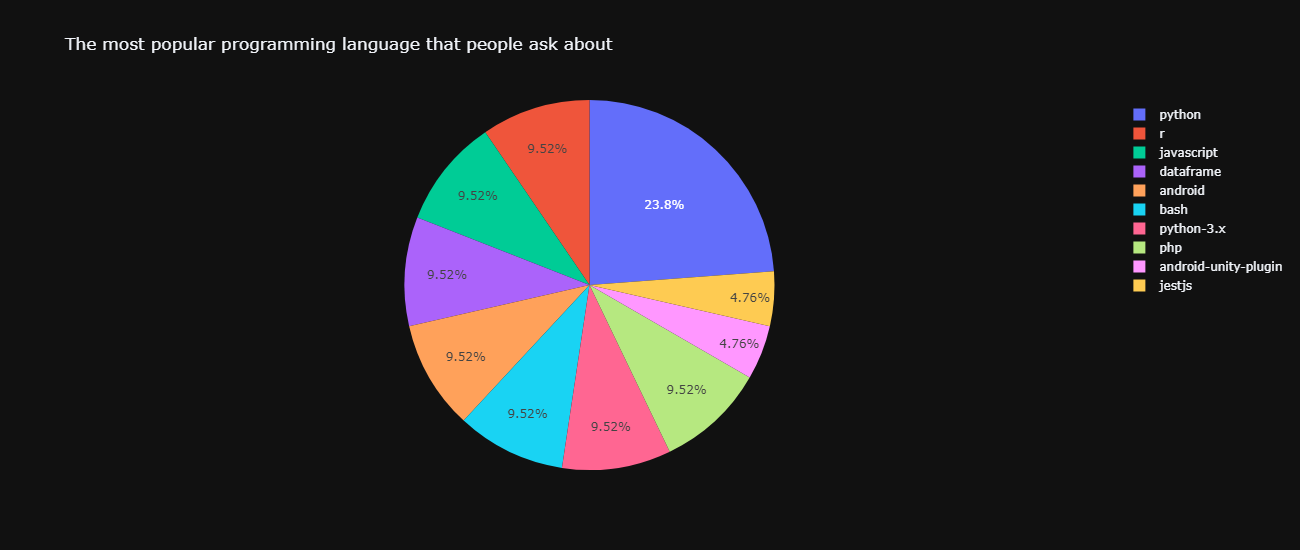

In [28]:
fig1 = px.pie(df_count.sort_values(by='count',ascending= False).head(10), 
        values='count', names='tags', 
        title='The most popular programming language that people ask about', width=1300, height=550)

fig1.show("png")

# **Thank You**